In [1]:
import pandas as pd

In [2]:
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/ELCOT/Desktop/abc/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
x=df.iloc[:,3:13]  #### first 3 columns are not useful for our model

In [8]:
y=df.iloc[:,13]

In [11]:
df.isna().sum()                 ####no missing data here

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
geography=pd.get_dummies(x["Geography"],drop_first=True)

In [8]:
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [9]:
X=pd.concat([x,geography,gender],axis=1)

In [10]:
X.drop(columns=["Geography","Gender"],inplace=True)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [14]:
x_train.shape

(6700, 11)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
x_train=sc.fit_transform(x_train)

In [18]:
x_test=sc.transform(x_test)

In [19]:
import keras

In [20]:
from keras.models import Sequential

In [21]:
from keras.layers import Dense

In [22]:
from keras.layers import Dropout

In [23]:
classifier=Sequential()

In [24]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=11)) ####creating hidden layer1

In [25]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu")) ####creating hidden layer2

In [26]:
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [27]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [28]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
449/449 [==============================] - 3s 6ms/step - loss: 0.5723 - accuracy: 0.7424 - val_loss: 0.5184 - val_accuracy: 0.7970
Epoch 2/100
449/449 [==============================] - 2s 5ms/step - loss: 0.4689 - accuracy: 0.8104 - val_loss: 0.4730 - val_accuracy: 0.8042
Epoch 3/100
449/449 [==============================] - 2s 4ms/step - loss: 0.4390 - accuracy: 0.8155 - val_loss: 0.4550 - val_accuracy: 0.8106
Epoch 4/100
449/449 [==============================] - 2s 4ms/step - loss: 0.4260 - accuracy: 0.8164 - val_loss: 0.4451 - val_accuracy: 0.8110
Epoch 5/100
449/449 [==============================] - 2s 4ms/step - loss: 0.4183 - accuracy: 0.8202 - val_loss: 0.4386 - val_accuracy: 0.8137
Epoch 6/100
449/449 [==============================] - 2s 4ms/step - loss: 0.4137 - accuracy: 0.8220 - val_loss: 0.4332 - val_accuracy: 0.8156
Epoch 7/100
449/449 [==============================] - 2s 4ms/step - loss: 0.4088 - accuracy: 0.8251 - val_loss: 0.4285 - val_accuracy: 0.8219

Epoch 58/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3264 - accuracy: 0.8661 - val_loss: 0.3565 - val_accuracy: 0.8499
Epoch 59/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3259 - accuracy: 0.8659 - val_loss: 0.3555 - val_accuracy: 0.8504
Epoch 60/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3260 - accuracy: 0.8685 - val_loss: 0.3562 - val_accuracy: 0.8504
Epoch 61/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3263 - accuracy: 0.8674 - val_loss: 0.3539 - val_accuracy: 0.8522
Epoch 62/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3261 - accuracy: 0.8674 - val_loss: 0.3552 - val_accuracy: 0.8504
Epoch 63/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3255 - accuracy: 0.8681 - val_loss: 0.3547 - val_accuracy: 0.8517
Epoch 64/100
449/449 [==============================] - 2s 4ms/step - loss: 0.3257 - accuracy: 0.8674 - val_loss: 0.3571 - val_accuracy:

In [30]:
y_pred=classifier.predict(x_test)
y_pred=y_pred>0.5


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(y_test,y_pred)

In [33]:
import seaborn as sns

<AxesSubplot:>

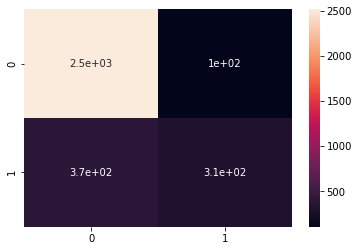

In [34]:
sns.heatmap(cm,annot=True)

In [35]:
from sklearn.metrics import accuracy_score


In [36]:
print(accuracy_score(y_test,y_pred))

0.8551515151515151
